<a href="https://colab.research.google.com/github/akiabe/coursera-ml-stanford/blob/master/Logistic_regression_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

# Load data
data = np.loadtxt(open("ex2data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]

In [0]:
# Plotting function
import matplotlib.pyplot as plt

def plot_data(X, y):
    """
    Plots the data points X and y

    Arguments:
    X -- Data on x axis, shape (n_samples, 2)
    y -- Data on y axis, shape (n_samples,)

    """
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)

    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')

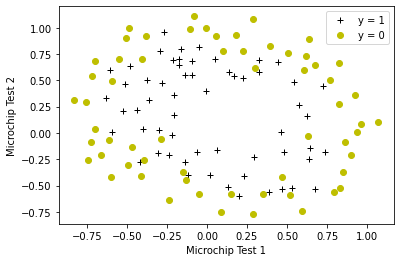

In [4]:
plt.figure()
plot_data(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'], loc='upper right', numpoints=1)
plt.show()

In [0]:
# Maps input features to polynomial ones
def map_feature(X1, X2):

    """
    Feature mapping function to polynomial features
    
    Arguments:
    X1 -- Input feature (n_samples,)
    X2 -- Input feature (n_samples,)
    
    Returns:
    Out -- New feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
           (n_samples, 28)
           
    """
    degree = 6
    Out = np.ones(len(X1))

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            tmp = np.power(X1, i - j) * np.power(X2, j)
            Out = np.vstack((Out, tmp))
    return Out.T

In [0]:
# Add polynominal features
X = map_feature(X[:, 0], X[:, 1])

In [0]:
# Initialize parameters

m, n = X.shape

# Initialize fitting parameters
initial_theta = np.zeros(n)

# Set regularization parameter lambda to 1
lambd = 1.0

In [0]:
# Sigmoid function
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

In [0]:
# Computes the cost and gradient for logistic regression with regularization
def cost_function_regularization(theta, X, y, lambd):
    """
    Compute cost and gradient for logistic regression with regularization

    Arguments:
    theta -- Linear regression parameter, shape (n_features,)
    X -- Training data, where n_samples is the number of samples and n_features is the number of features,
         shape (n_samples, n_features)
    y -- Labels, shape (n_samples,)
    Lambd -- Regularization parameter

    Returns:
    J -- Cost of using theta as the parameter for regularized logistic regression w.r.t. the parameters
    grad -- Partial derivatives of the cost w.r.t. each parameter in theta, shape (n_features,)

    """
    m, n = X.shape
    
    mask = np.eye(len(theta))
    
    # Skip the theta[0, 0] parameters when performing regularization
    mask[0, 0] = 0
    
    h = sigmoid(np.dot(X, theta.T))
    J = (1/m) * np.sum(np.dot((-y), np.log(h))-np.dot((1-y), np.log(1-h))) + (lambd/2*m)*np.sum(np.dot(mask, theta))
    
    grad = (1/m) * (np.dot((h-y), X)) + (lambd/m) * np.dot(mask, theta)
    
    return J, grad

In [15]:
cost, _ = cost_function_regularization(initial_theta, X, y, lambd)

print ("Cost at initial theta (zeros): ", cost)

Cost at initial theta (zeros):  0.6931471805599454


In [0]:
# Train the model
import scipy.optimize as opt

theta, nfeval, rc = opt.fmin_tnc(func=cost_function_regularization, x0=initial_theta, args=(X, y, lambd))

In [0]:
# Plot the decision boundary
def plot_decision_boundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta
    
    Arguments:
    theta -- Linear regression parameter (n_features,)
    X -- Training data, where n_samples is the number of samples and n_features is the number of features.
         (n_samples, n_features)
    y -- Labels (n_samples,)

    """
    if X.shape[1] <= 3:
        plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
        plt.plot(plot_X, plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        # u.resize((len(u), 1))
        v = np.linspace(-1, 1.5, 50)
        # v.resize((len(v), 1))
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
        z = z.T
        u, v = np.meshgrid(u, v)
        cs = plt.contour(u, v, z, levels=[0])
        fmt = {}
        strs = ['Decision boundary']
        for l, s in zip(cs.levels, strs):
            fmt[l] = s

        plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)

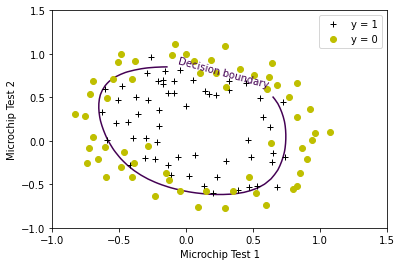

In [19]:
plt.figure()
plot_data(X[:, 1:], y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'], loc='upper right', numpoints=1)
plot_decision_boundary(theta, X, y)
plt.show()

In [0]:
# Predicts the input data with learned logistic regression parameters
def predict(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

In [23]:
# Compute accuracy on the training set
p = predict(theta, X) 
print('Train Accuracy :', np.mean(p == y) * 100)

Train Accuracy : 83.05084745762711
